In [2]:
import cv2
import numpy

'''
opencv里自带了分离三通道的函数split()，
返回值依次是蓝色、绿色和红色通道的灰度图.
定义了三个函数来获取三个通道的子矩阵。
'''

# 获取红色通道：
def get_red(img): 
	redImg = img[:,:,2]
	return redImg
	

# 获取绿色通道：
def get_green(img):
	greenImg = img[:,:,1]
	return greenImg
	
    
# 获取蓝色通道
def get_blue(img):
	blueImg = img[:,:,0]
	return blueImg
	
    
# 调用上述三个函数，显示分离结果，并与之前的比较。
if __name__ == '__main__':
	img = cv2.imread("/home/tong/图片/cat.png")
	b, g, r = cv2.split(img)
	cv2.imshow("Blue 1", b)
	cv2.imshow("Green 1", g)
	cv2.imshow("Red 1", r)
	b = get_blue(img)
	g = get_green(img)
	r = get_red(img)
	cv2.imshow("Blue 2", b)
	cv2.imshow("Green 2", g)
	cv2.imshow("Red 2", r)
	cv2.waitKey(0)
	cv2.destroyAllWindows()

In [3]:
'''
RGB到HSV的转换的Demo
'''

# -*- coding:utf-8 -*-

import cv2

"""
功能：读取一张图片，显示出来，并转化为HSV色彩空间
"""
image = cv2.imread('/home/tong/图片/iron.jpeg') # 根据路径读取一张图片
cv2.imshow("BGR", image) # 显示图片


# 转化图片到HSV色彩空间
dst = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
cv2.imshow("HSV", dst) # 显示图片
cv2.waitKey(0) # 等待键盘触发事件，释放窗口

-1

In [4]:
# -*- coding:utf-8 -*-

import cv2
import numpy as np   # ------------------改变1

"""
功能：读取一张图片，显示出来，并转化为HSV色彩空间
"""
image = cv2.imread('/home/tong/图片/iron.jpeg') # 根据路径读取一张图片
cv2.imshow("BGR", image) # 显示图片


# 转化图片到HSV色彩空间
dst = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
cv2.imshow("HSV", dst) # 显示图片


# 根据HSV提取头发 --------------------------------改变2
low_hsv = np.array([0, 0, 46])
high_hsv = np.array([200, 40, 220])
dst = cv2.inRange(dst, low_hsv, high_hsv)
cv2.imshow("result", dst) # 显示图片

cv2.waitKey(0) # 等待键盘触发事件，释放窗口

-1

In [5]:
# -*- coding:utf-8 -*-

import cv2
import numpy as np

"""
功能：读取一张图片，显示出来，转化为HSV色彩空间
     并通过滑块调节HSV阈值，实时显示
"""

image = cv2.imread('/home/tong/图片/iron.jpeg') # 根据路径读取一张图片
cv2.imshow("BGR", image) # 显示图片

hsv_low = np.array([0, 0, 0])
hsv_high = np.array([0, 0, 0])

# 下面几个函数，写得有点冗余

def h_low(value):
    hsv_low[0] = value

def h_high(value):
    hsv_high[0] = value

def s_low(value):
    hsv_low[1] = value

def s_high(value):
    hsv_high[1] = value

def v_low(value):
    hsv_low[2] = value

def v_high(value):
    hsv_high[2] = value

cv2.namedWindow('image')
cv2.createTrackbar('H low', 'image', 0, 255, h_low) 
cv2.createTrackbar('H high', 'image', 0, 255, h_high)
cv2.createTrackbar('S low', 'image', 0, 255, s_low)
cv2.createTrackbar('S high', 'image', 0, 255, s_high)
cv2.createTrackbar('V low', 'image', 0, 255, v_low)
cv2.createTrackbar('V high', 'image', 0, 255, v_high)

while True:
    dst = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # BGR转HSV
    dst = cv2.inRange(dst, hsv_low, hsv_high) # 通过HSV的高低阈值，提取图像部分区域
    cv2.imshow('dst', dst)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [9]:
import cv2
import numpy as np

img = cv2.imread('/home/tong/图片/iron.jpeg')
 
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #彩色转化为灰度
gray=np.float32(gray) #转化为32浮点型
dst = cv2.cornerHarris(gray,15,23,0.04)
# 第三个参数：Sobel算法中孔，行列变化检测边缘。3-31之间奇数
#角点检测的敏感度
#第二个参数：参数值越小，标记角点的记号越小

img[dst>0.01*dst.max()]=[0,0,255]
cv2.namedWindow("corners", cv2.WINDOW_NORMAL)
while(True):
    cv2.imshow('corners',img)
    if cv2.waitKey(10000) & 0xff == ord('q'): #退出循环条件
        break
cv2.destroyAllWindows()
#cv2.imshow('corners',img)
#cv2.waitKey(0) #退出循环条件
#cv2.destroyAllWindows()

In [2]:
import cv2
import numpy as np

img = cv2.imread('/home/tong/图片/iron.jpeg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift=cv2.xfeatures2d.SIFT_create()
#sift对象适用DoG检测关键点，并计算特征向量
#返回关键点信息和描述符
keypoints,descriptor=sift.detectAndCompute(gray,None)


img=cv2.drawKeypoints(image=img,outImage=img,keypoints=keypoints,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,color=(51,163,236))

cv2.namedWindow('sift_keypoints',cv2.WINDOW_NORMAL)
cv2.imshow('sift_keypoints',img)
while(True):
    if cv2.waitKey(1000) & 0xff==ord('q'):
        break
cv2.destroyAllWindows()

AttributeError: module 'cv2' has no attribute 'xfeatures2d'

In [21]:
import cv2
import numpy as np

img = cv2.imread('/home/tong/图片/iron.jpeg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift=cv2.xfeatures2d.SIFT_create()
#sift对象适用DoG检测关键点，并计算特征向量
#返回关键点信息和描述符
keypoints,descriptor=sift.detectAndCompute(gray,None)


img=cv2.drawKeypoints(image=img,outImage=img,keypoints=keypoints,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,color=(51,163,236))

cv2.namedWindow('sift_keypoints',cv2.WINDOW_NORMAL)
cv2.imshow('sift_keypoints',img)
while(True):
    if cv2.waitKey(1000) & 0xff==ord('q'):
        break
cv2.destroyAllWindows()

AttributeError: module 'cv2' has no attribute 'xfeatures2d'

ModuleNotFoundError: No module named 'python_opencv'

AttributeError: module 'cv2' has no attribute 'xfeatures2d'

In [10]:
from imutils import perspective
from skimage.filters import threshold_local
import cv2
import imutils
 
# 边缘扫描
image = cv2.imread('/home/tong/图片/iron.jpeg')
ratio = image.shape[0]/500.0
orig = image.copy()
image = imutils.resize(image, height = 500)
 
# 灰度转换及边缘查找
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 75, 200)
 
# 只保留轮廓
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]
 
for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    if len(approx) == 4:
        screenCnt = approx
        break
    
warped = perspective.four_point_transform(orig, screenCnt.reshape(4, 2) * ratio)
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
T = threshold_local(warped, 11, offset = 10, method = "gaussian")
warped = (warped > T).astype("uint8") * 255
 
cv2.imshow("Original", imutils.resize(orig, height = 650))
cv2.imshow("Scanned", imutils.resize(warped, height = 650))
cv2.waitKey(0)

ModuleNotFoundError: No module named 'scipy'

In [9]:
!pip install imutils


You should consider upgrading via the 'pip install --upgrade pip' command.


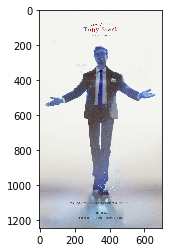

(<matplotlib.image.AxesImage at 0x7efd300de358>, None)

In [18]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/home/tong/图片/iron.jpeg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)
    
    
cv2.imshow("iron",img)
plt.imshow(img),plt.show()

In [25]:
import numpy as np
import cv2

img = cv2.imread('/home/tong/图片/iron.jpeg')
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fast = cv2.FastFeatureDetector_create(threshold=35)

kp = fast.detect(grayImg, None)
img2 = cv2.drawKeypoints(img, kp, None, (255, 0, 0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

print('Threshold: ', fast.getThreshold())
print('nonmaxSuppression: ', fast.getNonmaxSuppression())
print('neighborhood: ', fast.getType())
print('Total Keypoints with nonmaxSuppression: ', len(kp))

cv2.imshow('fast_true', img2)

fast.setNonmaxSuppression(False)
kp = fast.detect(grayImg, None)

print('Total Keypoints without nonmaxSuppression: ', len(kp))

img3 = cv2.drawKeypoints(img, kp, None, (255, 0, 0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('fast_false', img3)

cv2.waitKey()
cv2.destroyAllWindows()

Threshold:  35
nonmaxSuppression:  True
neighborhood:  2
Total Keypoints with nonmaxSuppression:  837
Total Keypoints without nonmaxSuppression:  2930


In [29]:
import numpy as np
import cv2

img = cv2.imread('/home/tong/图片/iron.jpeg')
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 创建一个CenSurE检测器
orb = cv2.ORB_create(nfeatures=200)

kp, des = orb.detectAndCompute(grayImg, None)

img2 = cv2.drawKeypoints(img, kp, None, (0, 255, 0), 0)

cv2.imshow('KP', img2)
cv2.waitKey()
cv2.destroyAllWindows()

In [30]:
import numpy as np
import cv2

img1 = cv2.imread('/home/tong/图片/iron.jpeg')
img2 = cv2.imread('/home/tong/图片/iron_crop.png')
grayImg1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
grayImg2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
matchImg = np.zeros_like(img1)

orb = cv2.ORB_create(nfeatures=50)

kp1, des1 = orb.detectAndCompute(grayImg1, None)
kp2, des2 = orb.detectAndCompute(grayImg2, None)

# 创建BF匹配对象 使用Hamming距离
bf = cv2.BFMatcher_create(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
matchImg = cv2.drawMatches(img1, kp1, img2, kp2, matches, matchImg, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

cv2.imshow('match', matchImg)
cv2.waitKey()
cv2.destroyAllWindows()

In [34]:
# USAGE
# python ball_tracking.py --video ball_tracking_example.mp4
# python ball_tracking.py

# import the necessary packages
from collections import deque
from imutils.video import VideoStream
import numpy as np
import argparse
import cv2
import imutils
import time

# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-v", "--video",
	help="path to the (optional) video file")
ap.add_argument("-b", "--buffer", type=int, default=64,
	help="max buffer size")
args = vars(ap.parse_args())

# define the lower and upper boundaries of the "green"
# ball in the HSV color space, then initialize the
# list of tracked points
greenLower = (29, 86, 6)
greenUpper = (64, 255, 255)
pts = deque(maxlen=args["buffer"])

# if a video path was not supplied, grab the reference
# to the webcam
if not args.get("video", False):
	vs = VideoStream(src=0).start()

# otherwise, grab a reference to the video file
else:
	vs = cv2.VideoCapture(args["video"])

# allow the camera or video file to warm up
time.sleep(2.0)

# keep looping
while True:
	# grab the current frame
	frame = vs.read()

	# handle the frame from VideoCapture or VideoStream
	frame = frame[1] if args.get("video", False) else frame

	# if we are viewing a video and we did not grab a frame,
	# then we have reached the end of the video
	if frame is None:
		break

	# resize the frame, blur it, and convert it to the HSV
	# color space
	frame = imutils.resize(frame, width=600)
	blurred = cv2.GaussianBlur(frame, (11, 11), 0)
	hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)

	# construct a mask for the color "green", then perform
	# a series of dilations and erosions to remove any small
	# blobs left in the mask
	mask = cv2.inRange(hsv, greenLower, greenUpper)
	mask = cv2.erode(mask, None, iterations=2)
	mask = cv2.dilate(mask, None, iterations=2)

	# find contours in the mask and initialize the current
	# (x, y) center of the ball
	cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
		cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	center = None

	# only proceed if at least one contour was found
	if len(cnts) > 0:
		# find the largest contour in the mask, then use
		# it to compute the minimum enclosing circle and
		# centroid
		c = max(cnts, key=cv2.contourArea)
		((x, y), radius) = cv2.minEnclosingCircle(c)
		M = cv2.moments(c)
		center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))

		# only proceed if the radius meets a minimum size
		if radius > 10:
			# draw the circle and centroid on the frame,
			# then update the list of tracked points
			cv2.circle(frame, (int(x), int(y)), int(radius),
				(0, 255, 255), 2)
			cv2.circle(frame, center, 5, (0, 0, 255), -1)

	# update the points queue
	pts.appendleft(center)

	# loop over the set of tracked points
	for i in range(1, len(pts)):
		# if either of the tracked points are None, ignore
		# them
		if pts[i - 1] is None or pts[i] is None:
			continue

		# otherwise, compute the thickness of the line and
		# draw the connecting lines
		thickness = int(np.sqrt(args["buffer"] / float(i + 1)) * 2.5)
		cv2.line(frame, pts[i - 1], pts[i], (0, 0, 255), thickness)

	# show the frame to our screen
	cv2.imshow("Frame", frame)
	key = cv2.waitKey(1) & 0xFF

	# if the 'q' key is pressed, stop the loop
	if key == ord("q"):
		break

# if we are not using a video file, stop the camera video stream
if not args.get("video", False):
	vs.stop()

# otherwise, release the camera
else:
	vs.release()

# close all windows
cv2.destroyAllWindows()

usage: ipykernel_launcher.py [-h] [-v VIDEO] [-b BUFFER]
ipykernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-fdf88ac3-ae77-4260-928b-334ecd631d80.json


SystemExit: 2